<a href="https://colab.research.google.com/github/starmath4/Tarea/blob/main/Proyecto%20final/Proyecto_final_machine_learnin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
#Librerias
import tensorflow as tf
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [179]:
files=["/content/drive/MyDrive/ML2023/Food Classification dataset/Sandwich",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/Taco",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/omelette",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/sushi",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/ice_cream",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/Hot Dog",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/Donut",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/Crispy Chicken",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/cheesecake",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/apple_pie"]

In [183]:
num_px = 64
num_categories = 10  # Categorías
num_images_per_category = 1000  # Imágenes por categoría

categorias_x = [[] for _ in range(num_categories)]

for i, carpeta in enumerate(files):
    print(f"Carpeta: {carpeta}, Categoría: {i}")  # Imprimir nombre de la carpeta y su número de categoría
    files_in_folder = glob.glob(carpeta + "/*")
    for j, file in enumerate(files_in_folder[:num_images_per_category]):
        img = Image.open(file)
        img = img.resize((num_px, num_px)).convert('L')  # Redimensionar imágenes y convertirlas a escala de grises
        data = np.asarray(img)
        categorias_x[i].append(data)
        img.close()

for i in range(num_categories):
    categorias_x[i] = np.array(categorias_x[i])

Carpeta: /content/drive/MyDrive/ML2023/Food Classification dataset/Sandwich, Categoría: 0
Carpeta: /content/drive/MyDrive/ML2023/Food Classification dataset/Taco, Categoría: 1
Carpeta: /content/drive/MyDrive/ML2023/Food Classification dataset/omelette, Categoría: 2
Carpeta: /content/drive/MyDrive/ML2023/Food Classification dataset/sushi, Categoría: 3
Carpeta: /content/drive/MyDrive/ML2023/Food Classification dataset/ice_cream, Categoría: 4
Carpeta: /content/drive/MyDrive/ML2023/Food Classification dataset/Hot Dog, Categoría: 5
Carpeta: /content/drive/MyDrive/ML2023/Food Classification dataset/Donut, Categoría: 6
Carpeta: /content/drive/MyDrive/ML2023/Food Classification dataset/Crispy Chicken, Categoría: 7
Carpeta: /content/drive/MyDrive/ML2023/Food Classification dataset/cheesecake, Categoría: 8
Carpeta: /content/drive/MyDrive/ML2023/Food Classification dataset/apple_pie, Categoría: 9


Son 9 categorías:


* Sándwich
* Taco
* Omelette
* Sushi
* Helado
* Hot dog
* Dona
* Pollo
* Cheesecake
* Pastel de manzana

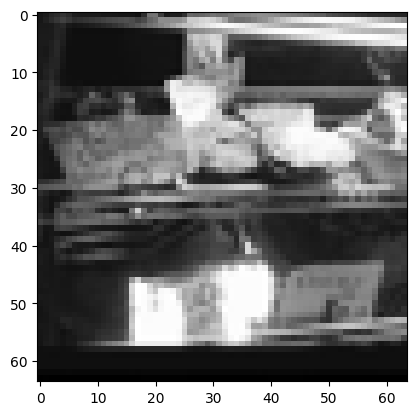

In [184]:
#Ejemplo de una imagen el primer indice es la categoría; 0 a 8, el segundo índice es el número de imagen; 0 al 99
plt.imshow(categorias_x[9][999], cmap='gray')
plt.show()

In [185]:
#Divido los datos en conjuntos de entrenamiento y validación
train_categorias_x = []
test_categorias_x = []
train_categorias_y = []
test_categorias_y = []

for i, categoria_images in enumerate(categorias_x):
    images_train, images_test = train_test_split(categoria_images, test_size=0.2, random_state=42)
    train_categorias_x.extend(images_train)
    test_categorias_x.extend(images_test)

    # Etiquetas para los conjuntos de entrenamiento
    labels_train = [i] * len(images_train)
    labels_test = [i] * len(images_test)
    train_categorias_y.extend(labels_train)
    test_categorias_y.extend(labels_test)

# Convertir listas a arrays
train_categorias_y = np.array(train_categorias_y)
test_categorias_y = np.array(test_categorias_y)

In [186]:
# Reformatear los conjuntos de datos de entrenamiento y prueba
train_categorias_x = np.stack(train_categorias_x)
test_categorias_x = np.stack(test_categorias_x)

# Normalizar los datos de entrada al rango [0, 1]
train_categorias_x = train_categorias_x.astype('float32') / 255.0
test_categorias_x = test_categorias_x.astype('float32') / 255.0


In [193]:
# Crear el modelo
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),tf.keras.layers.MaxPooling2D((2, 2)),  # Capa convolucional con 32 filtros de 3x3 y función de activación ReLU
    # Capa de pooling para reducir la dimensionalidad
    tf.keras.layers.Flatten(), # Capa de aplanado para convertir los datos en un vector 1D
    tf.keras.layers.Dense(128, activation='relu'),  # Capa densa (totalmente conectada) con 128 neuronas y función de activación ReLU
    tf.keras.layers.Dense(num_categories, activation='softmax') # Capa de salida con número de neuronas igual al número de categorías y función de activación softmax
])


# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
# Entrenar el modelo
batch_size = 40
epochs = 5

history = model.fit(train_categorias_x, train_categorias_y, batch_size=batch_size, epochs=epochs, validation_data=(test_categorias_x, test_categorias_y))

Epoch 1/5
200/200 [==============================] - 45s 221ms/step - loss: 2.5953 - accuracy: 0.1520 - val_loss: 2.1902 - val_accuracy: 0.1750
Epoch 2/5
200/200 [==============================] - 56s 282ms/step - loss: 2.0554 - accuracy: 0.2446 - val_loss: 2.0765 - val_accuracy: 0.2205
Epoch 3/5
200/200 [==============================] - 47s 236ms/step - loss: 1.8317 - accuracy: 0.3436 - val_loss: 2.0319 - val_accuracy: 0.2530
Epoch 4/5
200/200 [==============================] - 46s 232ms/step - loss: 1.6099 - accuracy: 0.4399 - val_loss: 2.0127 - val_accuracy: 0.2775
Epoch 5/5
200/200 [==============================] - 52s 263ms/step - loss: 1.3796 - accuracy: 0.5336 - val_loss: 2.2152 - val_accuracy: 0.2410


Posibles mejorar: Re-ajustar parámetros de red neuronal, graficar perdida.

1/1 [==============================] - 0s 53ms/step


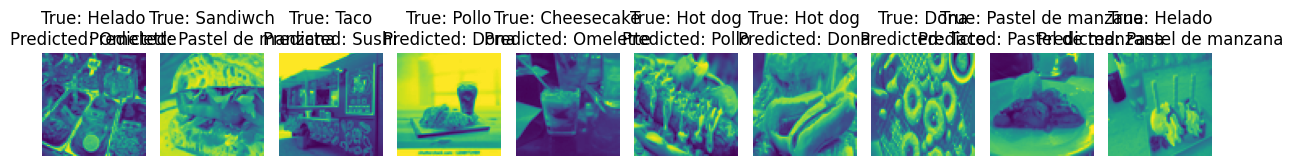

In [194]:
# Obtener algunas imágenes al azar del conjunto de prueba
num_samples = 10
random_indices = random.sample(range(len(test_categorias_x)), num_samples)
sample_images = test_categorias_x[random_indices]
sample_labels = test_categorias_y[random_indices]

# Realizar predicciones en las muestras
predictions = model.predict(sample_images)

# Clases disponibles
classes = ["Sandiwch","Taco","Omelette","Sushi","Helado","Hot dog","Dona","Pollo","Cheesecake","Pastel de manzana"]

# Mostrar las imágenes con sus predicciones
plt.figure(figsize=(12, 8))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {classes[sample_labels[i]]}\nPredicted: {classes[np.argmax(predictions[i])]}")
    plt.axis('off')

plt.tight_layout()
plt.show()